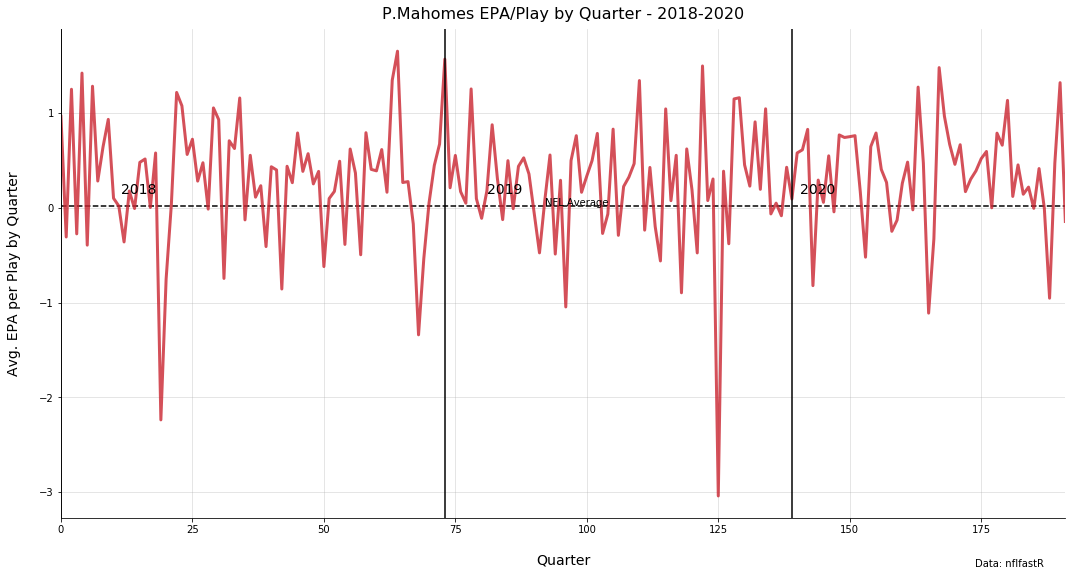

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

filePath = '/Users/Firefly/Desktop/_iMac_Drive/Joseph/Coding/NFL/Jupyter/'

# Choose whether you want the 'raw_play_by_play' or 'cleaned_play_by_play' data 
#file = 'raw_play_by_play_'
file = 'cleaned_play_by_play_'

pd.options.mode.chained_assignment = None

YEARS = [2018, 2019, 2020]

data = pd.DataFrame()

for i in YEARS:
    #Update for your path and file name(s)
    i_data = pd.read_csv(filePath + file + str(i) + '.csv.gz',
                         compression='gzip', engine='python')
    
    data = data.append(i_data, sort=True)
    
data.reset_index(drop=True, inplace=True)

COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

#Get dropbacks
data = data.loc[data.qb_epa.isna()==False]

#Abbreviated name of QB
qb = 'P.Mahomes'
# Get avg epa for qb's games
qb_games = data[['game_id', 'qb_epa', 'qtr', 'season', 'posteam']].loc[(data.passer==qb) | (data.rusher==qb)]

qb_games = (
    qb_games.groupby(['season', 'game_id', 'posteam', 'qtr'])[['qb_epa']]
    .mean()
    .reset_index()
    )

#Get average EPA per dropback
nfl_avg = data.qb_epa.mean()

fig, ax = plt.subplots(figsize=(18,9))

#Add average line
#Adjust as necessary for location of "NFL Average" label
x_offset = -100

ax.axhline(y=nfl_avg, color='black', linestyle='--')
ax.text(len(qb_games) + x_offset, nfl_avg+.007, 'NFL Average')

y = qb_games['qb_epa']
seasons = list(set(qb_games.season))
seasons.sort()

ax.plot(np.arange(len(y)), y, linewidth=3, color=COLORS[qb_games.posteam.iloc[0]], alpha=.8)

#Get indexes where season changes
x_lines = qb_games.loc[qb_games.season.diff() != 0].index.tolist()

#Add season marker lines
for i in x_lines:
    ax.axvline(x=i, color='black')
    
#Where label is located on y-axis, adjust as needed
label_vheight = .15

#Add final index to x_lines for label placement
x_lines.append(len(y))

#Get midpoints
label_locs = x_lines[:-1] + np.diff(x_lines)/2 - 25

#Add season labels
for j in range(len(label_locs)):
    ax.text(label_locs[j], label_vheight, seasons[j], fontsize=14)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.margins(x=0)

# Add game id and quarter as x ticks
#my_xticks = qb_games['game_id'] + ' ' + str(qb_games['qtr'])

first_year = qb_games.season.iloc[0]
last_year = qb_games.season.iloc[-1]

ax.set_title(qb + ' EPA/Play by Quarter - ' + str(first_year) + '-' + str(last_year)
             , fontsize=16, pad=10)

ax.set_xlabel('Quarter', fontsize=14, labelpad=18)

ax.set_ylabel('Avg. EPA per Play by Quarter', fontsize=14, labelpad=18)

plt.figtext(.83, 0.05, 'Data: nflfastR', fontsize=10)

plt.savefig('qbCareerEPA.png', dpi=400)

In [21]:
qb_quarters = (
    qb_games.groupby(['season', 'game_id', 'qtr', 'result'])[['qb_epa']]
    .mean()
    .reset_index()
    .sort_values(by=['qb_epa'],ascending=False)
    .reset_index(drop=True)
    )
qb_quarters.head(10)

,season,game_id,qtr,result,qb_epa
0,2018,2018_17_OAK_KC,4,32,1.651848
1,2019,2019_01_KC_JAX,1,-14,1.568110
2,2019,2019_16_KC_CHI,4,-23,1.496181
3,2020,2020_07_KC_DEN,4,-27,1.478783
4,2018,2018_02_KC_PIT,1,-5,1.420908
5,2018,2018_17_OAK_KC,3,32,1.346118
6,2019,2019_13_OAK_KC,4,31,1.342235
7,2020,2020_14_KC_MIA,3,-6,1.320039
8,2018,2018_02_KC_PIT,3,-5,1.282350
9,2020,2020_06_KC_BUF,4,-9,1.273165


In [24]:
qb_games.groupby(['qtr'])[['qb_epa']].mean()

,qb_epa
qtr,
1,0.294292
2,0.291032
3,0.318985
4,0.264968
5,0.065348
